# <center> CS-4476: PS0 </center>

## <center> Part 1: Short Answer Problems </center>

## Question 1

I read trough all parts of both documents that discussed things I was unfamiliar with.

## Question 2

(a) The command will set x to be a list of length 1000 with every integer between 0 and 999 inclusive.

(b) The variable <i>a</i> will be a numpy (2D) array with shape (3, 3). The variable <i>b</i> is set using a mixture of intexing and slicing, it will be equal to the third row of <i>a</i> and have shape (3,).

(c) This reshaping will make <i>b</i> a one dimensional vector of all the elements of <i>a</i>, it will also be one dimension smaller than a.

(d) the randn function in the random package will, in this case, create a 5 by 1 array of positive and negative numbers between -1 and 1 exclusive. <i>g</i> will then be a 1D vector of all the elements of <i>f</i> greater than 0.

(e) <i>x</i> will be a one dimensional vector of 10 numbers, all of which are equal to 0 + 0.5 (so 0.5). <i>y</i> will be the same thing but because we multiply 0.5 by a series of 1s. <i>z</i> will then be the element by element sum of these, so a 1D vector of length 10 with just 1s.

(f) <i>a</i> will be a 1D vector of all integers between 1 and 99 inclusive listed in ascending order. b will be the same thing but in reverse (descending) order.

## Question 3

In [621]:
from PIL import Image
import numpy as np
import pylab

In [627]:
# (a)
N = 5
die_roll_results = np.random.randint(1, 7, N)
print(die_roll_results)

[1 6 2 5 5]


In [628]:
# (b)
y = np.array([1, 2, 3, 4, 5, 6])
z = np.reshape(y, (3, 2))
print(y)
print(z)

[1 2 3 4 5 6]
[[1 2]
 [3 4]
 [5 6]]


In [629]:
# (c)
x = np.max(z)
arr = np.where(z == x)
r = arr[0][0]
c = arr[1][0]
print(x)
print(arr)
print(r)
print(c)

6
(array([2], dtype=int64), array([1], dtype=int64))
2
1


In [508]:
#(d)
v = np.array([1, 8, 8, 2, 1, 3, 9, 8])
x = np.count_nonzero(v == 1)
print(x)

2


## Question 4

In [633]:
import numpy as np
import matplotlib.pyplot as plt
file_name = 'inputAPS0Q.npy'
M = 100
N = 100

In [634]:
# Creating 100x100 matrix 
A = np.random.randint(0, 256, (M, N))
print(A)

np.save(file_name, A)

[[108 186  51 ... 210 115 126]
 [195  71  88 ... 178   6 123]
 [151  57 104 ... 167 108 209]
 ...
 [ 17 126 210 ... 191 218  50]
 [ 56 216  89 ... 216  98  73]
 [150  45  38 ... 241 174  15]]


[[108 186  51 ... 210 115 126]
 [195  71  88 ... 178   6 123]
 [151  57 104 ... 167 108 209]
 ...
 [ 17 126 210 ... 191 218  50]
 [ 56 216  89 ... 216  98  73]
 [150  45  38 ... 241 174  15]]


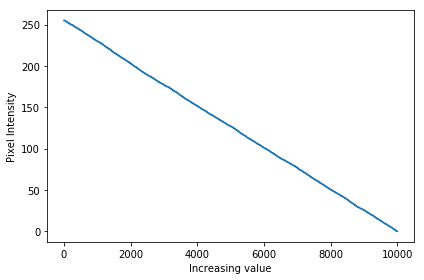

In [635]:
# 4.a)
# Reading in the image
A = np.load(file_name)
print(A)

# Creating x axis range
A_vector = A.reshape(-1)
A_sorted_vector = np.sort(A_vector)
A_rev_sorted_vector = A_sorted_vector[::-1]
plt.plot(A_rev_sorted_vector)

plt.xlabel('Increasing value')
plt.ylabel('Pixel Intensity')
plt.tight_layout()
pylab.savefig('Question_4a.png')

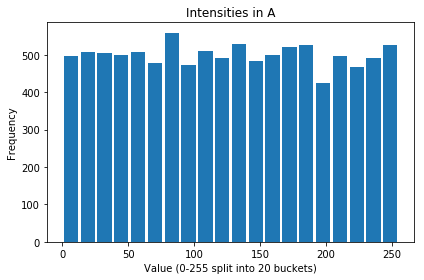

In [636]:
# 4.b)
plt.hist(A_sorted_vector, bins=20, rwidth=0.85)

plt.title("Intensities in A")
plt.xlabel("Value (0-255 split into 20 buckets)")
plt.ylabel("Frequency")

fig = plt.gcf()

plt.tight_layout()
pylab.savefig('Question_4b.png')

(50L, 50L)


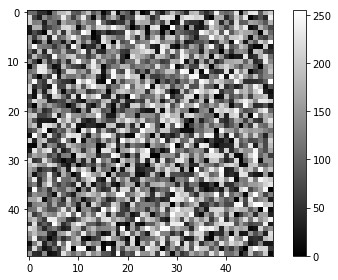

In [637]:
# 4.c)
output_image = "outputXPS0Q1.png"
output_file = "outputXPS0Q1.npy"

X = np.array(A[M/2:, :N/2])
print(X.shape)

plt.imshow(X, interpolation=None, cmap='gray')
plt.colorbar()

plt.tight_layout()
pylab.savefig('Question_4c.png')

np.save(output_file, X)

(100L, 100L)


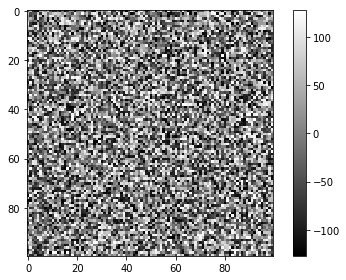

In [638]:
# 4.d)
output_image = "outputYPS0Q1.png"
output_file = "outputYPS0Q1.npy"
Y = A - np.mean(A)
print(Y.shape)

plt.imshow(Y, interpolation=None, cmap='gray')
plt.colorbar()

plt.tight_layout()
pylab.savefig('Question_4d.png')

np.save(output_file, Y)

[[False  True False ...  True False False]
 [ True False False ...  True False False]
 [ True False False ...  True False  True]
 ...
 [False False  True ...  True  True False]
 [False  True False ...  True False False]
 [ True False False ...  True  True False]]
[[  0. 255.   0. ... 255.   0.   0.]
 [255.   0.   0. ... 255.   0.   0.]
 [255.   0.   0. ... 255.   0. 255.]
 ...
 [  0.   0. 255. ... 255. 255.   0.]
 [  0. 255.   0. ... 255.   0.   0.]
 [255.   0.   0. ... 255. 255.   0.]]
100


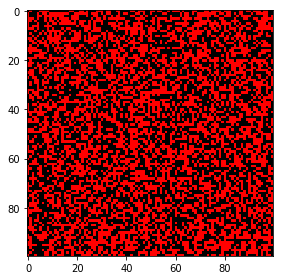

In [639]:
# 4. e)
threshold = np.mean(A)

# Gettign all entries in A above the mean of A
above_thresh = (A > threshold)
print(above_thresh)

# Making MxN array of 1s and setting to 255 where A > threshold and 0 otherwise
temp = 255 * np.ones((M, N))
R = above_thresh * temp
print(R)

G = np.zeros((M, N))
B = np.zeros((M, N))

Z = np.stack([R, G, B], axis = 2)

print(len(Z[1]))

plt.imshow(Z, interpolation=None)

plt.tight_layout()
pylab.savefig('outputZPS0Q1.png')

np.save("outputZPS0Q1.npy", Z)

## <center> Part 2: Short Programming Example </center>

In [516]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

IMAGE_NAME = "parrots.jpg"

(dtype('uint8'), (490L, 980L, 3L))


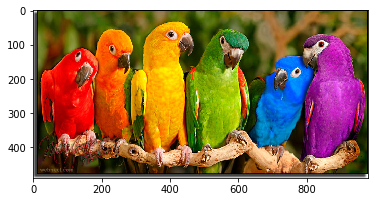

In [517]:
# Reading in the image
parrots = mpimg.imread(IMAGE_NAME)

print(parrots.dtype, parrots.shape)

# Plotting the image
parrots_plot = plt.imshow(parrots)

(490L, 980L, 3L)


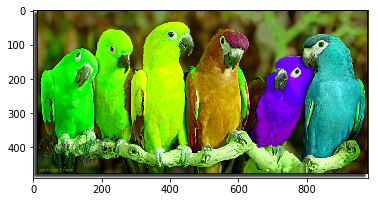

In [554]:
# 1.
OUTPUT_FILE = "swapImgPS0Q2.png"

image_grb = np.stack([parrots[:, :, 1], parrots[:, :, 0], parrots[:, :, 2]], axis=2)

print(image_grb.shape)

plt.imshow(parrots_grb)

im = Image.fromarray(image_grb)
im.save(OUTPUT_FILE)

(490L, 980L)


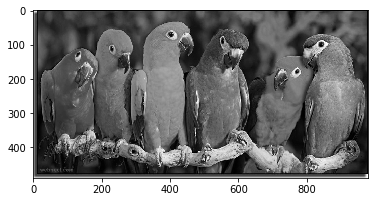

In [555]:
# 2.
OUTPUT_FILE = "grayImgPS0Q2.png"

R = parrots[:, :, 0].astype(int)
G = parrots[:, :, 1].astype(int)
B = parrots[:, :, 2].astype(int)

image_gray = np.array((R + G + B) / 3, dtype=np.uint8)

print(image_gray.shape)

plt.imshow(image_gray, cmap='gray')

im = Image.fromarray(image_gray)
im.save(OUTPUT_FILE)

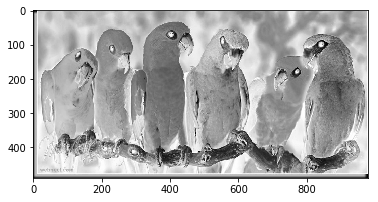

In [556]:
# 3.
# (a)
OUTPUT_FILE = "negativeImgPS0Q2.png"

image_negative = 255 - image_gray

plt.imshow(image_negative, cmap='gray')

im = Image.fromarray(image_negative)
im.save(OUTPUT_FILE)

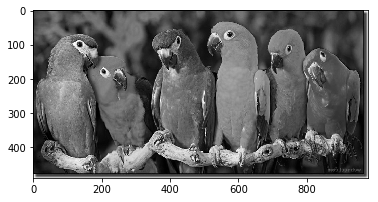

In [557]:
# 3.
# (b)
OUTPUT_FILE = "mirrorImgPS0Q2.png"

image_mirrored = np.fliplr(image_gray)

plt.imshow(image_mirrored, cmap='gray')

im = Image.fromarray(image_mirrored)
im.save(OUTPUT_FILE)

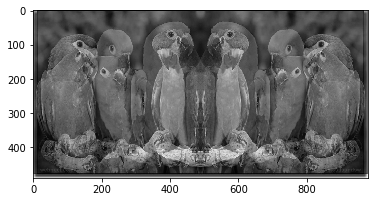

In [558]:
# 3.
# (c)
OUTPUT_FILE = "avgImgPS0Q2.png"

original = image_gray.astype(int)
mirrored = image_mirrored.astype(int)

image_mirror_averaged = np.array((original + mirrored) / 2, dtype=np.uint8)

plt.imshow(image_mirror_averaged, cmap='gray')

im = Image.fromarray(image_mirror_averaged)
im.save(OUTPUT_FILE)

[[280 413 396 ... 202  87 212]
 [305 375 469 ... 152  43  14]
 [421 350 274 ... 305 212 211]
 ...
 [365 450 419 ... 433 476 440]
 [384 482 274 ... 418 279 437]
 [386 446 340 ... 303 326 282]]
[[255 255 255 ... 202  87 212]
 [255 255 255 ... 152  43  14]
 [255 255 255 ... 255 212 211]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 202  87 212]
 [255 255 255 ... 152  43  14]
 [255 255 255 ... 255 212 211]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


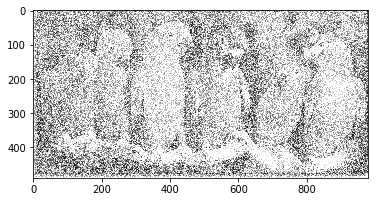

In [640]:
# 3.
# (d)
OUTPUT_FILE = "addNoiseImgPS0Q2.png"
NOISE_FILE = "noise.npy"

noise = np.random.randint(0, 256, (image_gray.shape[0], image_gray.shape[1]))

np.save(NOISE_FILE, noise)

image_raw_noise = image_gray.astype(int) + noise.astype(int)
print(image_raw_noise)

image_clipped_noise = np.clip(image_raw_noise, 0, 255)
print(image_clipped_noise)

image_noise = np.array(image_clipped_noise, dtype = np.uint8)
print(image_noise)

plt.imshow(image_noise, cmap='gray')

im = Image.fromarray(image_noise)
im.save(OUTPUT_FILE)